<a href="https://colab.research.google.com/github/cnserge/corpus/blob/main/chi2AndMosaicplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from __future__ import division
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm  # for the calculation of pearson residuals
import matplotlib as mpl
import scipy.stats as stats
import os

set working directory

In [ ]:
# csvdir = "/insert/your/directory/here"

# example
csvdir = r"E:\Dropbox\Peter\Documenten_Taalkunde\Onderwijs 7, Corpus studies\2024-2025\corpus_studies\resources"

change working directory to set directory

In [21]:
os.chdir(csvdir)

NameError: name 'csvdir' is not defined

Read the data from the Excel or csv file

In [43]:
df = pd.read_excel("/content/sample_data/data.xlsx")


Subset the dataframe to the targeted cleft data only

In [61]:
clefts = df[df['category'] == 'cleft_target']

In [45]:
df.columns

Index(['nr', 'previous_turns', 'speaker_id', 'pre', 'match', 'match+1',
       'match+2', 'match+3', 'post', 'id', 'url', 'role', 'category',
       'subcategory', 'notes', 'type', 'focus', 'sentiment_annotator1',
       'sentiment_annotator2', 'generalization_annotator1',
       'generalization_annotator2', 'hedging_annotator1', 'hedging_annotator2',
       'age_cohort', 'gender', 'name', 'age', 'occupation', 'location'],
      dtype='object')

Create a mosaic plot for the variables of choice (in this example: cleft type by gender)
Subset your data to the category and values you want to look at

In [62]:
vals = ['positive', 'negative', 'neutral'] # example: we want to look at cleft type, restricting ourselves to the four basic cleft types, ignoring typos in values or other values
                                                    # so, for sentiment analysis e.g., set vals to ['positive', 'negative', 'neutral']
dataInput = clefts[clefts['sentiment_annotator1'].isin(vals)]

Create a contingency table, and print it

In [63]:
plotInput = pd.crosstab(dataInput['gender'], dataInput['sentiment_annotator1']) # change the column names to the column names of the data you want to look at
print(plotInput)

sentiment_annotator1  negative  neutral  positive
gender                                           
f                           32       51        12
m                           10       24         5
u                            5       11         0


Calculate chi-square statistics
Store output of chi-square test into separate variables and print them

In [65]:
chi2, p, dof, expected = stats.chi2_contingency(plotInput)

print("chi square value =" + str(chi2))
print("p-value =" + str(p))
print("degrees of freedom =" + str(dof))
print("\nexpected values =")
print(expected) # matrix of expected values (under a normal/chi-square distribution)

chi square value =3.306296810672978
p-value =0.5079352028122742
degrees of freedom =4

expected values =
[[29.76666667 54.46666667 10.76666667]
 [12.22       22.36        4.42      ]
 [ 5.01333333  9.17333333  1.81333333]]


calculate Pearson residuals and print them (for more information see: https://www.statology.org/pearson-residuals/; for the calculation in python, see https://stackoverflow.com/questions/20453729/what-is-the-equivalent-of-r-data-chisqresiduals-in-python)

Rule of thumb: if the standardized Pearson residuals are larger than 2 or smaller than -2, this probably means something is going on in that cell (a correlation beyond chance)

In [66]:
table = sm.stats.Table(plotInput)
print("Pearson residuals")
print(table.resid_pearson)
print("\n")
print("Standardized Pearson residuals")
print(table.standardized_resids)

Pearson residuals
sentiment_annotator1  negative   neutral  positive
gender                                            
f                     0.428182 -0.445951  0.286882
m                    -0.624488  0.363137  0.218413
u                    -0.067324  0.511766 -1.024162


Standardized Pearson residuals
sentiment_annotator1  negative   neutral  positive
gender                                            
f                     0.850253 -1.121753  0.502536
m                    -0.874890  0.644450  0.269930
u                    -0.086036  0.828468 -1.154588


Create the mosaic plot

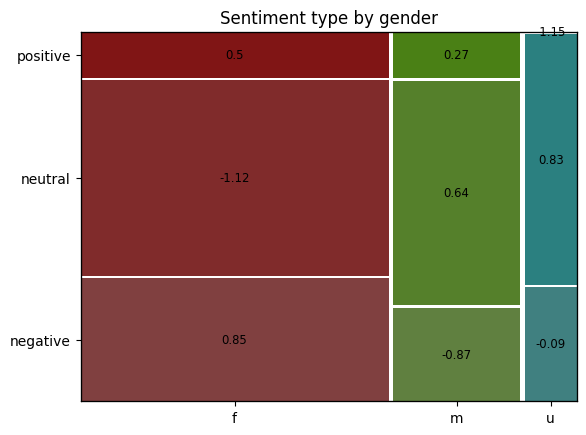

In [69]:
# define labels for plot tiles
labels = table.standardized_resids  # now feeding standardized residuals into the labelizer; change the input variable to
                                    # table.resid_pearson for non-standardized pearson residuals
                                    # PlotInput for raw counts

# convert the dataframe to a dictionary, as the mosaic plot labelizer attribute requires a dictionary as input
label_values = {}
for header in list(labels):
    for index in labels.index:
        label_values[(index, header)] = round(labels.loc[index, header], 2)

labelizer = lambda k:label_values[k]
mosaic(plotInput.stack(), gap=0.01, title="Sentiment type by gender", labelizer=labelizer) # change the title accordingly

plt.savefig("mosaicplot.png", bbox_inches='tight')
# plt.close()


In [68]:
print(dataInput['gender'].value_counts())
print(dataInput['type'].value_counts())

gender
f    95
m    39
u    16
Name: count, dtype: int64
type
TBA          63
canonical    50
IP           34
other         3
ambiguous     1
Name: count, dtype: int64
